In [5]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

import matplotlib.pyplot as plt

### Load data

In [43]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
y_train.shape

(60000,)

In [46]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

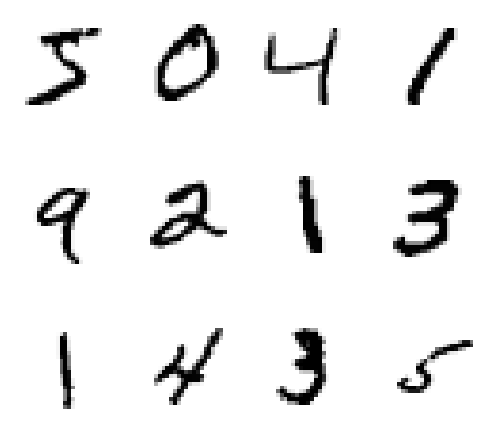

In [47]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(x_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [48]:
x_valid.shape

(10000, 28, 28)

In [49]:
y_valid.shape

(10000,)

In [50]:
#y_valid.reshape(10000,1)

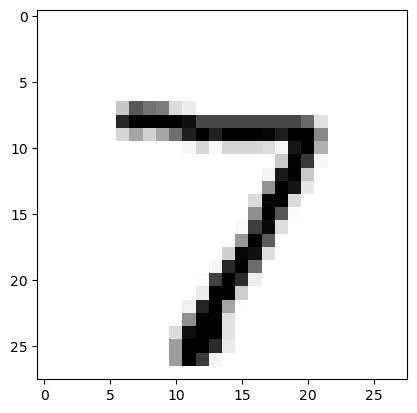

In [51]:
plt.imshow(x_valid[0], cmap='Greys')

In [52]:
y_valid[0]

7

### Preprocess data

In [53]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_valid = x_valid.reshape(10000, 28, 28, 1).astype('float32') / 255

In [54]:
n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [55]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [56]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Design neural network

In [57]:
model = Sequential()

# first hidden layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# second hidden layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

# third hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(n_classes, activation='softmax'))

2024-03-11 12:26:36.124409: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-11 12:26:36.124434: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2024-03-11 12:26:36.124439: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2024-03-11 12:26:36.124495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-11 12:26:36.124535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### Configure model

In [63]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

### Train model

In [64]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1,
          validation_data=(x_valid, y_valid))

Epoch 1/10


2024-03-11 12:34:06.934073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 16ms/step - loss: 0.2774 - accuracy: 0.9197 - val_loss: 0.0754 - val_accuracy: 0.9802
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1808 - accuracy: 0.9613 - val_loss: 0.0962 - val_accuracy: 0.9803
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2204 - accuracy: 0.9656 - val_loss: 0.0958 - val_accuracy: 0.9844
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2588 - accuracy: 0.9677 - val_loss: 0.1160 - val_accuracy: 0.9859
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3437 - accuracy: 0.9689 - val_loss: 0.1786 - val_accuracy: 0.9847
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4755 - accuracy: 0.9685 - val_loss: 0.1935 - val_accuracy: 0.9862
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.6773 - accuracy: 0.9675 - val_loss: 0.3132 - val_accuracy: 0.9848
Epoch 8/1